# Basic Stock Anaylsis Toolset
### The following displays the code for selecting and bringing out stock values and their respective key factors from Yahoo Finance
##### PS- The following is only a technique for basic sectional inputs from the webpage and can be done in a simpler way by importing pre-built libraries.

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas_datareader as web
#import plotly as py

C:\Users\Bhaskar voleti\Anaconda2\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Lets use one of the libraries from the nse to get the List of the Companies and their abrevations.

In [7]:
from nsetools import Nse
from pprint import pprint
nse = Nse()
all_stock_codes = nse.get_stock_codes()  #STOCK NAMES AND SHORT NAMES
pprint(all_stock_codes)

{'20MICRONS': '20 Microns Limited',
 '21STCENMGM': '21st Century Management Services Limited',
 '3IINFOTECH': '3i Infotech Limited',
 '3MINDIA': '3M India Limited',
 '5PAISA': '5Paisa Capital Limited',
 '63MOONS': '63 moons technologies limited',
 '8KMILES': '8K Miles Software Services Limited',
 'A2ZINFRA': 'A2Z Infra Engineering Limited',
 'AARTIDRUGS': 'Aarti Drugs Limited',
 'AARTIIND': 'Aarti Industries Limited',
 'AARVEEDEN': 'Aarvee Denims & Exports Limited',
 'ABAN': 'Aban Offshore Limited',
 'ABB': 'ABB India Limited',
 'ABBOTINDIA': 'Abbott India Limited',
 'ABCAPITAL': 'Aditya Birla Capital Limited',
 'ABFRL': 'Aditya Birla Fashion and Retail Limited',
 'ABGSHIP': 'ABG Shipyard Limited',
 'ABMINTLTD': 'ABM International Limited',
 'ACC': 'ACC Limited',
 'ACCELYA': 'Accelya Kale Solutions Limited',
 'ACE': 'Action Construction Equipment Limited',
 'ADANIENT': 'Adani Enterprises Limited',
 'ADANIPORTS': 'Adani Ports and Special Economic Zone Limited',
 'ADANIPOWER': 'Adani Pow

 'KIRIINDUS': 'Kiri Industries Limited',
 'KIRLOSBROS': 'Kirloskar Brothers Limited',
 'KIRLOSENG': 'Kirloskar Oil Engines Limited',
 'KIRLOSIND': 'Kirloskar Industries Limited',
 'KITEX': 'Kitex Garments Limited',
 'KKCL': 'Kewal Kiran Clothing Limited',
 'KMSUGAR': 'K.M.Sugar Mills Limited',
 'KNRCON': 'KNR Constructions Limited',
 'KOHINOOR': 'Kohinoor Foods Limited',
 'KOKUYOCMLN': 'Kokuyo Camlin Limited',
 'KOLTEPATIL': 'Kolte - Patil Developers Limited',
 'KOPRAN': 'Kopran Limited',
 'KOTAKBANK': 'Kotak Mahindra Bank Limited',
 'KOTARISUG': 'Kothari Sugars And Chemicals Limited',
 'KOTHARIPET': 'Kothari Petrochemicals Limited',
 'KOTHARIPRO': 'Kothari Products Limited',
 'KPIT': 'KPIT Technologies Limited',
 'KPRMILL': 'K.P.R. Mill Limited',
 'KRBL': 'KRBL Limited',
 'KREBSBIO': 'Krebs Biochemicals and Industries Limited',
 'KRIDHANINF': 'Kridhan Infra Limited',
 'KSBPUMPS': 'KSB Pumps Limited',
 'KSCL': 'Kaveri Seed Company Limited',
 'KSERASERA': 'KSS Limited',
 'KSK': 'KSK Ene

### Here we are introducing a new start, end date for our data retrival from the net by using the DataReader, which reads up data from the website and stores in a Dataframe.
#### We then introduce it and save it in the csv file accordingly. We can read up from the csv file and then apply the following various changes

In [11]:
#style.use('ggplot')
#start=dt.datetime(2017,8,22)
#end=dt.datetime(2017,12,31)
#df=web.DataReader('RCOM.NS','yahoo',start,end)
#df.to_csv('rcom2.csv')

#### The following code snippet takes values of the following dataset from the the above stated csv file and runs moving averages selection and plots for the moving averages. This is one of the parameters for investors to select while looking the growth/decline of a particular stock.

In [ ]:
#Moving averages and removing the values of the coloumn with NaN values
#df['50ma']=df['Adj Close'].rolling(window=50, min_periods=0).mean()
#df['100ma']=df['Adj Close'].rolling(winsdow=100, min_periods=0).mean()
#df['75ma']=df['Adj Close'].rolling(window=75, min_periods=0).mean()
#df.dropna(inplace=True)
#print(df.head(50))
#ax1=plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)
#ax2=plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1)
#Plotting values of the given moving averages of 50,75,100 weeks.

#ax1.plot(df.index, df['Adj Close'])
#ax1.plot(df.index, df['50ma'])
#ax1.plot(df.index, df['100ma'])
#ax1.plot(df.index, df['75ma'])
#ax2.bar(df.index, df['Volume'])
#plt.show()
#df['Open'].plot()


#### The following code snippet selects the OHLC- Open, High, Low, Close for the code and stores values in another dataset and also saves the values for the volume of the stocks traded in the particular time set.
#### Here we note that we convert simple dates to Mdates, for the single strand values of a date for the p

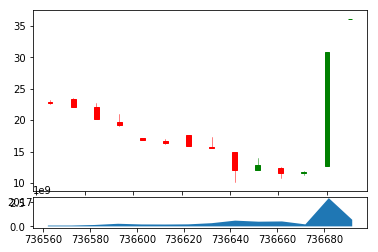

In [11]:
df=pd.read_csv('rcom2.csv', parse_dates=True, index_col=0)

#Axes
#ax1=plt.subplot2grid()
df_ohlc=df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)
ax1=plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)
ax2=plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1)
ax1.xaxis_date()

candlestick_ohlc(ax1,df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()